In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dog(img, k, sigma, p, size=(0, 0)):
    img1 = cv2.GaussianBlur(img, size, sigma)
    img2 = cv2.GaussianBlur(img, size, sigma * k)

    return ((1 + p) * img1) - p * img2

def thresholding(img, epsilon, phi):
    img = img / 255
    mask = img >= epsilon
    img[mask] = 1
    img[~mask] = 1 + np.tanh(phi * (img[~mask] - epsilon))
    img = img * 255
    return img

def xdog(img, k, sigma, p, epsilon, phi):
    dimg = dog(img, k, sigma, p)
    thresh = thresholding(dimg, epsilon, phi)
    thresh = np.stack((thresh, thresh, thresh), axis=2).astype(np.uint8)
    return thresh

# Example usage:
# img = cv2.imread('your_image.jpg')  # Replace with the path to your image
# result = xdog(img, k, sigma, p, epsilon, phi)
# plt.imshow(result)
# plt.show()


interactive(children=(FloatSlider(value=10.0, description='k', max=20.0, min=0.1), FloatSlider(value=10.0, des…

<function __main__.update(k, sigma, p, epsilon, phi)>

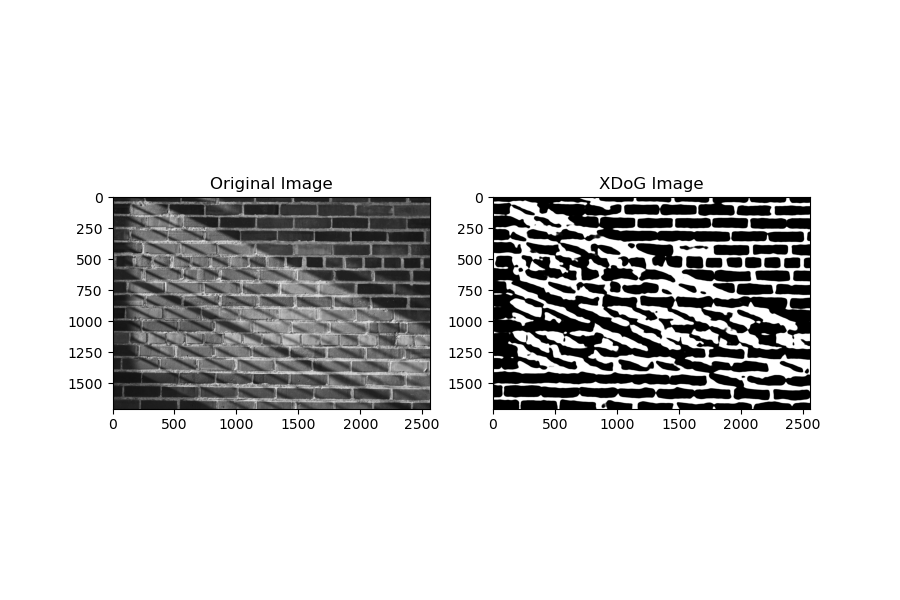

In [3]:
# use interactive slider to adjust the parameters

%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2

# load image
img = cv2.imread("./image/negative_edges/wall.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# convert to grayscale
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# plot the images in 16 by 9 aspect ratio
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img,cmap='gray')
ax.set_title("Original Image")

# ax = fig.add_subplot(1, 2, 2)
# ax.imshow(img,cmap='gray')
# ax.set_title("XDoG Image")

# define the function to be called when the slider is adjusted
def update(k,sigma,p,epsilon,phi):
    result = xdog(img,k,sigma,p,epsilon,phi)
    # plt.imshow(result,cmap='gray')
    # plt.title("XDoG Image")
    # plt.show()
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(result,cmap='gray')
    ax.set_title("XDoG Image")
    fig.canvas.draw_idle()

# create the sliders
interact(update, k=(0.1, 20, 0.1), sigma=(0.1, 20, 0.1), p=(0.1, 20, 0.1), epsilon=(0.1, 1.5, 0.01), phi=(0.1, 30, 0.1))

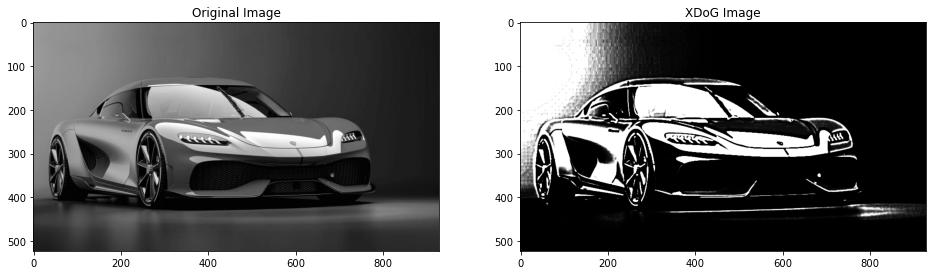

In [2]:
# load image and apply xdog
img = cv2.imread("./image/negative_edges/car2.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

result = xdog(img, 2.4, 1.3, 5.6, 0.54, 13.8)

# plot the images in 16 by 9 aspect ratio
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img,cmap='gray')
ax.set_title("Original Image")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(result,cmap='gray')
ax.set_title("XDoG Image")

plt.show()